# Prevendo o Valor de Residências

### Gustavo Ferrara Ataulo Zampieri
### 25/07/2022

In [123]:
# Imports
from PIL import Image
import scipy
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [543]:
# Carregando o arquivo
df = pd.read_csv("dados\dataset.csv")

In [4]:
# Formato do dataset
df.shape

(20640, 10)

In [5]:
# Tamanho do dataset
df.size

206400

In [7]:
# Informações gerais do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
# Visualizando primeiras linhas
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
# Visualizando últimas linhas
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [17]:
# Colunas 
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

### Iniciaremos realizando análise exploratória dos dados, para entender melhor cada variável existente no dataset.

In [17]:
# Separando variáveis numéricas
var_nums = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']

In [20]:
# Separando variável categórica
var_cat = ['ocean_proximity']

In [21]:
# Descrição dos dados numéricos
df[var_nums].describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [22]:
# Descrição da variável categórica
df[var_cat].describe()

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


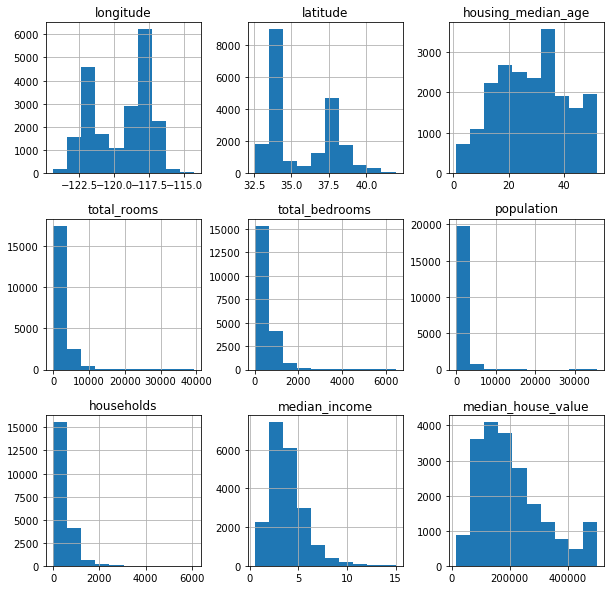

In [46]:
# Histogramas das variáveis numéricas
df[var_nums].hist(figsize=(10,10))
plt.show()

Através destes histogramas, conseguimos identificar aonde os dados mais estão concentrados em cada variável.

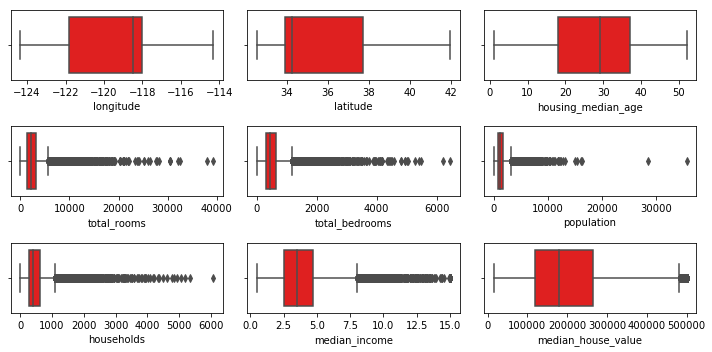

In [53]:
# Gráfico BoxPlot para verificar outliers
plt.figure(figsize=(10,5))
for i in range(0, len(var_nums)):
    plt.subplot(3, 3, i+1)
    sns.boxplot(df[var_nums[i]], color = "red", orient = "v")
    plt.tight_layout()

É possível visualizar que algumas variáveis possuem muitos outliers em relação a média de cada variável. Isto pode afetar diretamente a acurácia do modelo de regressão.

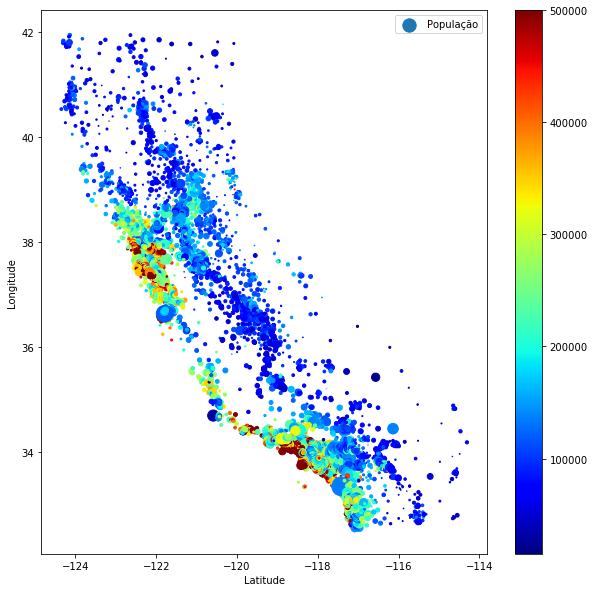

In [73]:
# Através de um gráfico ScatterPlot, inserimos as coordenadas para criarmos um mapa, através das variáveis longitude e latitude,
# e passamos a informação do valor médio das residências através da variável median_house_value.
plt.figure(figsize=(10,10))
plt.scatter(df["longitude"], df["latitude"], s = df["population"] / 100, c = df["median_house_value"], label = "População",
           cmap=plt.get_cmap('jet'))
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.colorbar()
plt.legend()
plt.show()

Veja abaixo um mapa da costa da Califórnia.

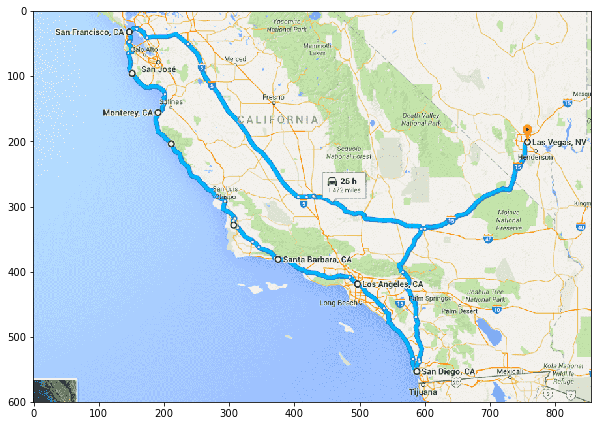

In [80]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(10,10))
img = mpimg.imread('dados\california.png')
imgplot = plt.imshow(img)
plt.show()

Através do gráfico e desta imagem, conseguimos ter algumas conclusões:
- Existe uma tendência para as residências mais caras estarem nas duas grandes cidades (Los Angeles e San Francisco);
- Normalmente, nas maiores cidades a renda das pessoas são maiores, logo existem residências mais caras;

In [92]:
# Verificando a correlação das variáveis
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967,-0.439870
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160,0.390957
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623,0.145163
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153,-0.016309
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,-0.021466
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650,-0.083537
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843,-0.027144
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075,-0.039673
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000,0.021732
ocean_proximity,-0.439870,0.390957,0.145163,-0.016309,-0.021466,-0.083537,-0.027144,-0.039673,0.021732,1.000000


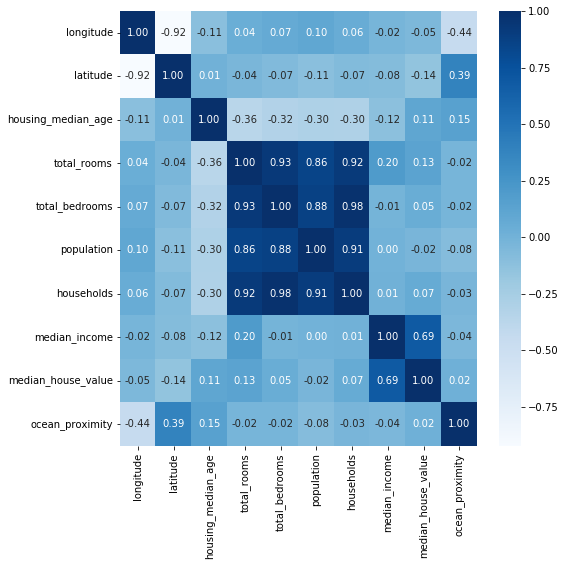

In [116]:
# Visualizando graficamente as correlações
plt.figure(figsize = (8, 8))
sns.heatmap(df.corr(), cmap = 'Blues', annot = True, fmt = '.2f')

Analisando, é possível perceber que as variáveis que possuem maior correlação com a variável target "median_house_value", são: "median_income", "total_rooms" e "housing_median_age".

In [106]:
# Separando variáveis que possuem maior correlação
cor = ["median_income", "total_rooms", "housing_median_age", "median_house_value"]

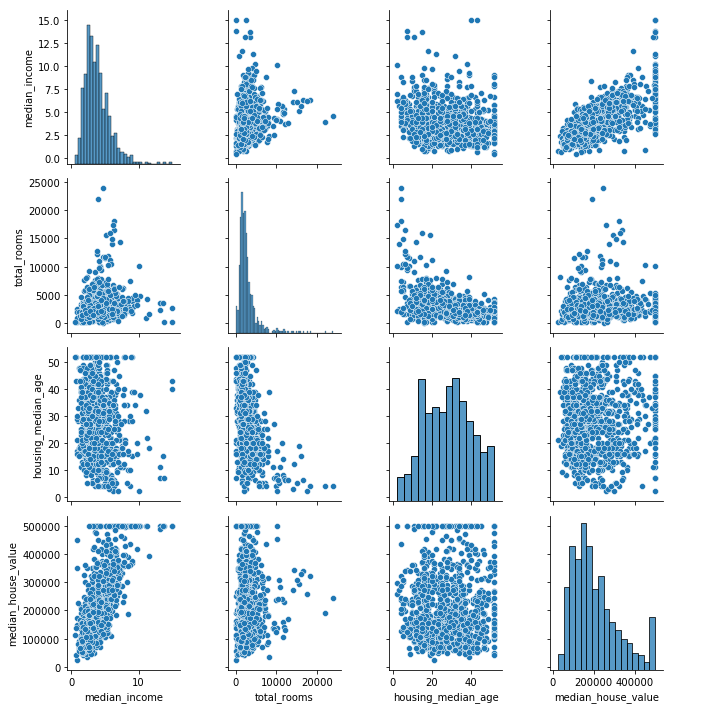

In [105]:
# Gráfico PairPlot para verificar essa correlação visualmente
sns.pairplot(df[cor].sample(1000))
plt.show()

É possível perceber que a variável que possui uma correlação mais clara é "median_income".

In [123]:
df[["median_house_value", "median_income"]].corr()

,median_house_value,median_income
median_house_value,1.000000,0.688075
median_income,0.688075,1.000000


<Figure size 720x720 with 0 Axes>

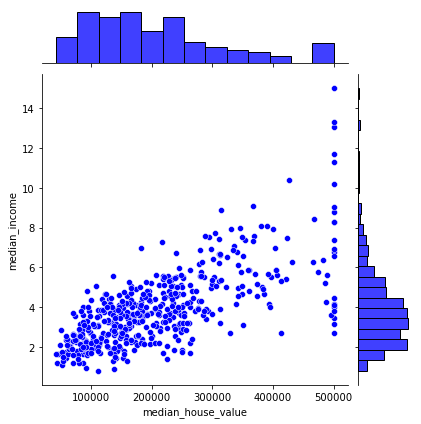

In [118]:
# Gráfico para analisar a variável median_income que possui a maior correlação com a target
plt.figure(figsize=(10,10))
sns.jointplot(data = df.sample(500), x = "median_house_value", y = "median_income", color = "blue")
plt.show()

No gráfico, é possível analisar que quanto maior a renda ("median_income") maior o valor médio da casa ("median_house_value"). No caso, temos uma correlação positiva entre as variáveis.

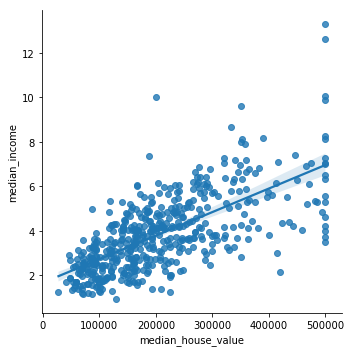

In [122]:
# Exibindo a reta que calcula a correlação
sns.lmplot(data = df.sample(500), x = "median_house_value", y = "median_income")

### Nesta etapa, separaremos as variáveis preditoras da variável alvo, e será feito o treinamento do modelo de aprendizado de máquina.

In [4]:
# Separando as variáveis preditoras
X = df[["median_income", "total_rooms", "housing_median_age"]]

In [5]:
# Separando a variável alvo (target)
y = df["median_house_value"]

In [6]:
# Separando o conjunto de dados em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [7]:
# Gravando em um objeto o algoritmo de padronização
scaler = StandardScaler()

In [8]:
# Treinando o algoritmo com os dados de treino
scaler.fit(X_treino)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [9]:
# Transformando os dados de treino e teste
x_treino = scaler.transform(X_treino)
x_teste = scaler.transform(X_teste)

In [10]:
x_treino[:3]

array([[-0.69217984,  0.04674592, -0.76391067],
       [-1.44186747, -0.9889141 ,  0.26859241],
       [-0.15108942, -0.74104073,  0.50686235]])

In [11]:
x_teste[:3]

array([[ 0.92764398, -0.36832931,  0.58628566],
       [ 4.13499168, -0.70228235,  0.66570897],
       [-0.76049237, -0.61530133,  1.45994211]])

In [12]:
# Gravando em um objeto o modelo de regressão
modelo_v1 = LinearRegression()

In [13]:
# Treinando os dados de treino
modelo_v1.fit(x_treino, y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
# Verificando os coeficientes do modelo treinado
modelo_v1.coef_

array([80916.89318037,  8915.61651399, 25914.34693756])

In [15]:
# Guardando os coeficientes em um dataframe
df_coef = pd.DataFrame(modelo_v1.coef_, X.columns, columns = ["Coeficientes"])
df_coef

,Coeficientes
median_income,80916.893180
total_rooms,8915.616514
housing_median_age,25914.346938


In [16]:
# Realizando a predição com os dados de teste
pred_v1 = modelo_v1.predict(x_teste)

In [17]:
pred_v1[:10]

array([293481.38067605, 552090.79797206, 177320.95988109, 198162.0543506 ,
       462319.56127401, 160540.25267199, 201923.50873774, 194262.74940504,
       269966.30912511, 310717.88866333])

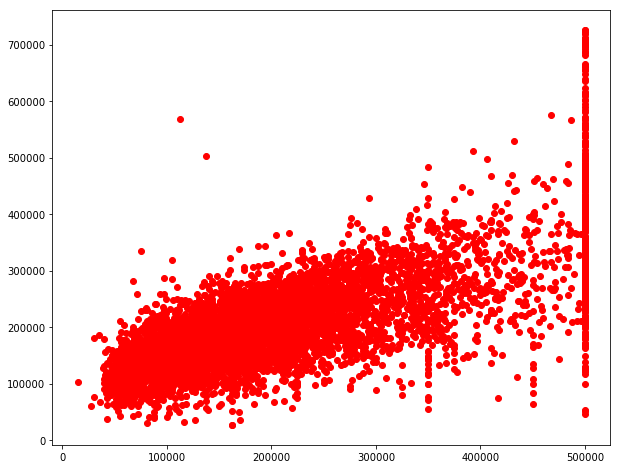

In [18]:
# Gráfico para visualizarmos a correlação
plt.figure(figsize=(10,8))
plt.scatter(x = y_teste, y = pred_v1, color = "red")
plt.show()

In [19]:
# Basicamente, a margem de erro do modelo
mean_absolute_error(y_teste, pred_v1)

60736.869403478595

In [20]:
# Acurácia do modelo
r2_score(y_teste, pred_v1)

0.4994739701270796

Veja que o modelo está com uma acurácia de aproximadamente 50%, um valor relativamente baixo.

### Realizando pré-processamento dos dados, para melhorar a acurácia do modelo.

In [62]:
# Carregando o arquivo
df = pd.read_csv("dados\dataset.csv")

In [63]:
# Verificando a existência de valores NaN
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [64]:
# Definindo o valor 0 onde existem valores NaN
df["total_bedrooms"].fillna(0, inplace = True)
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [65]:
# Verificando valores da variável ocean_proximity
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [66]:
# Criando um dicionário para a substituir os valores string para inteiros
dic_ocean = {
    "<1H OCEAN":0, "INLAND":1, "NEAR OCEAN":2, "NEAR BAY":3, "ISLAND":4
}

In [67]:
# Substituindo valores através de um map na variável
df["ocean_proximity"] = df["ocean_proximity"].map(dic_ocean)

In [68]:
# Verificando valores da variável ocean_proximity
df["ocean_proximity"].value_counts()

0    9136
1    6551
2    2658
3    2290
4       5
Name: ocean_proximity, dtype: int64

Obs.: Estamos alterando o tipo de dado, mas não a informação contida.

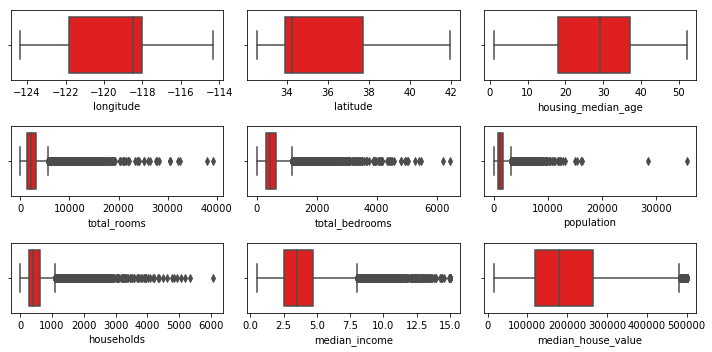

In [70]:
# Gráfico BoxPlot para verificar outliers
plt.figure(figsize=(10,5))
for i in range(0, len(var_nums)):
    plt.subplot(3, 3, i+1)
    sns.boxplot(df[var_nums[i]], color = "red", orient = "v")
    plt.tight_layout()

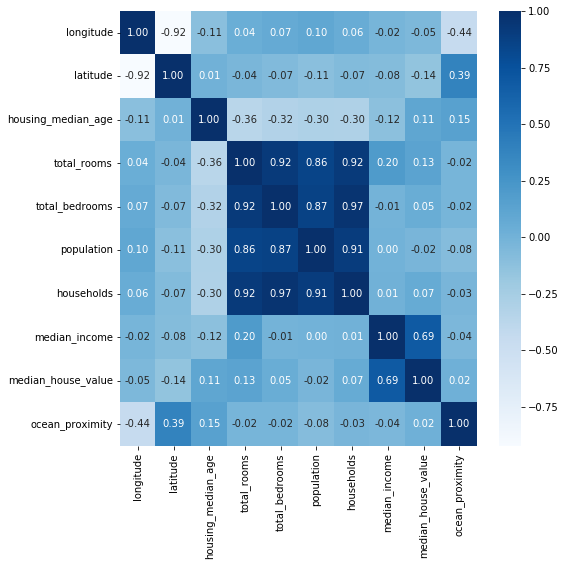

In [69]:
plt.figure(figsize = (8, 8))
sns.heatmap(df.corr(), cmap = 'Blues', annot = True, fmt = '.2f')

In [71]:
# Separando as variáveis que passarão por remoção de outliers
var_zscore1 = ["households", "population", "total_bedrooms"]

In [72]:
# Criando um array de "True" do tamanho do dataset
registros = np.array([True] * len(df))

In [73]:
np.count_nonzero(registros == True)

20640

In [74]:
# Calculando o z-score
for col in var_zscore1:
    zscore = abs(stats.zscore(df[col]))
    registros = (zscore < 0.5) & registros

In [75]:
# Outliers detectados
np.count_nonzero(registros == False)

12570

In [76]:
# Filtrando outliers e gravando no dataset
df = df[registros]

In [77]:
# Tamanho do dataset após a filtragem
df.size

80700

In [97]:
var_nums = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity']

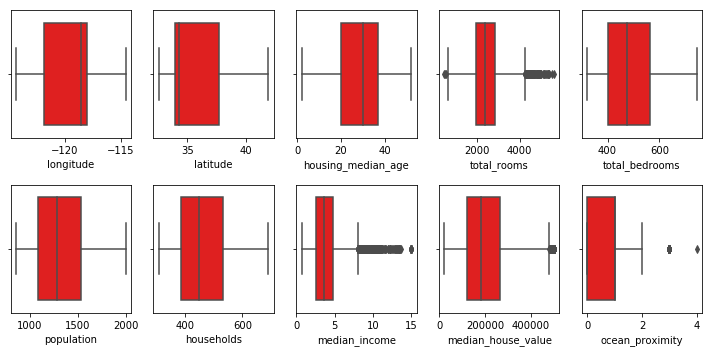

In [98]:
# Gráfico BoxPlot para verificar outliers
plt.figure(figsize=(10,5))
for i in range(0, len(var_nums)):
    plt.subplot(2, 5, i+1)
    sns.boxplot(df[var_nums[i]], color = "red", orient = "v")
    plt.tight_layout()

Note que as variáveis "households", "population" e "total_bedrooms" não possuem mais nenhum valor discrepante.

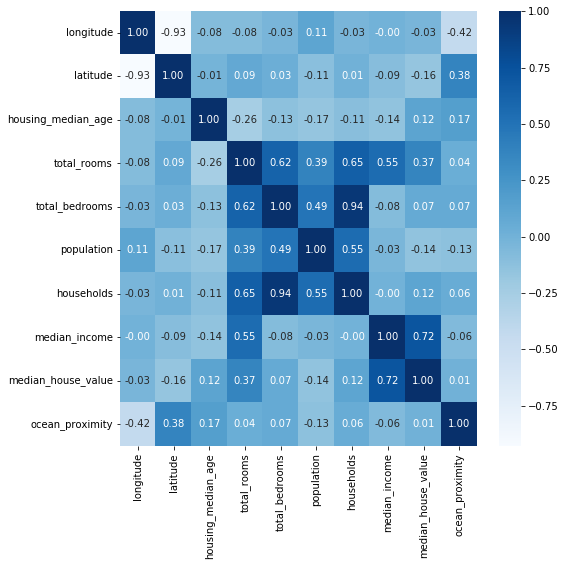

In [79]:
# Verificando a correlação novamente
plt.figure(figsize = (8, 8))
sns.heatmap(df.corr(), cmap = 'Blues', annot = True, fmt = '.2f')

Algumas observações importantes após o tratamento dos dados:
- A variável "median_income" aumentou sua acurácia;
- A variável "households" aumentou sua acurácia;
- A variável "population" aumentou sua acurácia;
- A variável "total_bedrooms" aumentou sua acurácia;
- A variável "total_rooms" aumentou consideravelmente sua acurácia;

### Após a realização da limpeza dos dados, será feito mais um treinamento para ver se melhorou a acurácia do nosso modelo.

In [99]:
# Separando as variáveis preditoras. Observe que inseri mais algumas variáveis
X1 = df[["median_income", "total_rooms", "housing_median_age", "total_bedrooms", "latitude", "longitude",
        "households", "population", "ocean_proximity"]]

In [100]:
# Separando variável target
y1 = df["median_house_value"]

In [101]:
# Separando os dados de treino e teste
X_treino1, X_teste1, y_treino1, y_teste1 = train_test_split(X1, y1, test_size = 0.3, random_state = 101)

In [102]:
# Padronização
scaler1 = StandardScaler()

In [103]:
# Treinando com os dados de treino
scaler1.fit(X_treino1)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [104]:
# Aplicando padronização nos dados de treino e teste
x_treino1 = scaler1.transform(X_treino1)
x_teste1 = scaler1.transform(X_teste1)

In [105]:
# Separando em um objeto o modelo de regressão
modelo_v2 = LinearRegression()

In [106]:
# Treinando o modelo
modelo_v2.fit(x_treino1, y_treino1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [107]:
modelo_v2.coef_

array([ 85394.15039424, -16831.38119774,  14698.27984663,  32883.50357   ,
       -86464.52260412, -80547.09445536,   8853.02733744, -25558.64408702,
        -3365.33167007])

In [108]:
# Guardando coeficientes em um dataset
df_coef1 = pd.DataFrame(modelo_v2.coef_, X1.columns, columns = ["Coeficientes"])
df_coef1

,Coeficientes
median_income,85394.150394
total_rooms,-16831.381198
housing_median_age,14698.279847
total_bedrooms,32883.503570
latitude,-86464.522604
longitude,-80547.094455
households,8853.027337
population,-25558.644087
ocean_proximity,-3365.331670


In [109]:
# Criando a predição do modelo
pred_v2 = modelo_v2.predict(x_teste1)

In [110]:
# Variação dos valores do modelo em relação a média
mean_absolute_error(y_teste1, pred_v2)

44272.23343069621

In [115]:
# Verificando a métrica R2
mod1_r2 = r2_score(y_teste1, pred_v2)
mod1_r2

0.7333521695955584

Observe que após o tratamento realizado e a inserção de mais variáveis, o nosso modelo melhorou consideravelmente para 73% na métrica R2.

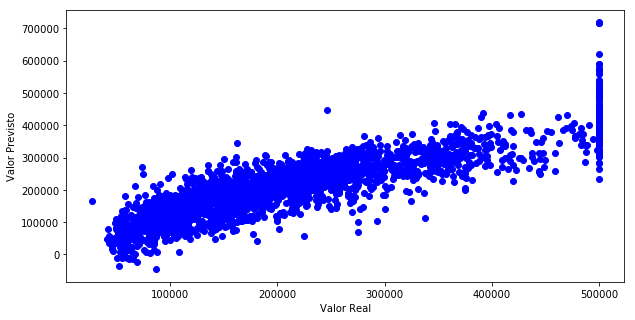

In [140]:
plt.figure(figsize = (10,5))
plt.scatter(x = y_teste1, y = pred_v2, color = "blue")
plt.xlabel("Valor Real")
plt.ylabel("Valor Previsto")
plt.show()

In [141]:
# Treinando outros modelos
modelo_v3 = Ridge(alpha = 1.0)

In [142]:
modelo_v3.fit(x_treino1, y_treino1)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [143]:
modelo_v3.coef_

array([ 85396.65469585, -16827.97789654,  14716.15244758,  32810.98481373,
       -86231.15309432, -80309.6288632 ,   8919.54601806, -25554.05037861,
        -3352.17342921])

In [145]:
pred_v3 = modelo_v3.predict(x_teste1)
pred_v3[:5]

array([252997.41179412, 158859.94156521,  75140.8838488 , 288669.07450122,
       148398.57697679])

In [146]:
mean_absolute_error(y_teste1, pred_v3)

44270.42508875632

In [147]:
r2_score(y_teste1, pred_v3)

0.7333610612367787

In [148]:
# Treinando outros modelos
modelo_v4 = Lasso(alpha = 1.0)

In [149]:
modelo_v4.fit(x_treino1, y_treino1)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [150]:
modelo_v4.coef_

array([ 85391.01914391, -16825.65027215,  14698.76208229,  32878.52854649,
       -86452.09897139, -80533.49151117,   8852.12779751, -25556.94324907,
        -3363.10862747])

In [152]:
pred_v4 = modelo_v4.predict(x_teste1)
pred_v4[:5]

array([253048.51376092, 158874.81553731,  75069.75480965, 288674.21765889,
       148500.59908407])

In [153]:
mean_absolute_error(y_teste1, pred_v4)

44272.06312895214

In [154]:
r2_score(y_teste1, pred_v4)

0.7333534673189629

O modelo que apresenta o menor erro absoluto é o **modelo_v3**